# **Decision trees**

In [223]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
!pip install graphviz
from graphviz import Source
from sklearn.tree import export_text

import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [224]:
bankNote = pd.read_csv('BankNote_Authentication.csv')
bankNote

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [225]:
feature_cols = ['variance','skewness','curtosis','entropy']
bankNote = bankNote.rename({'class':'genuine'}, axis=1)
bankNote.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
genuine     0
dtype: int64

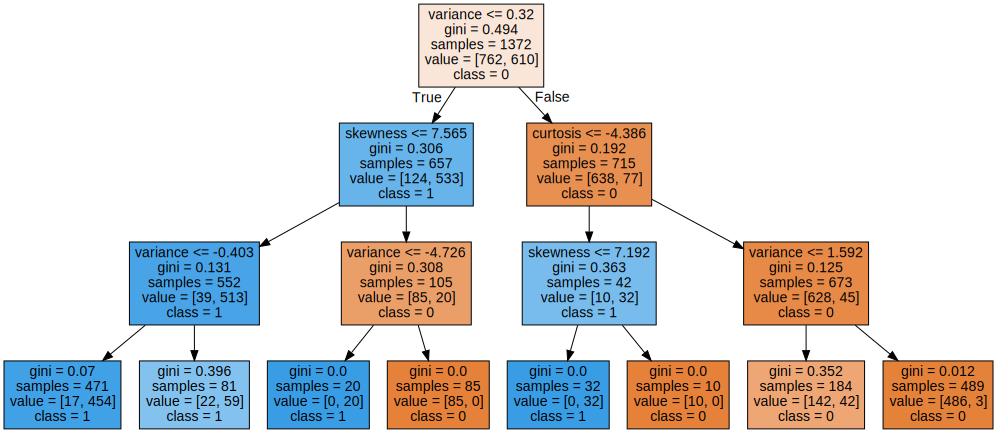

In [226]:
X = bankNote[feature_cols]
y = bankNote.genuine

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                    class_names=['0', '1'], filled = True))

svg = SVG(graph.pipe(format='svg'))
display(svg)

In [227]:
decision_rules = export_text(treeclf, feature_names=feature_cols)
print(decision_rules)

|--- variance <= 0.32
|   |--- skewness <= 7.57
|   |   |--- variance <= -0.40
|   |   |   |--- class: 1
|   |   |--- variance >  -0.40
|   |   |   |--- class: 1
|   |--- skewness >  7.57
|   |   |--- variance <= -4.73
|   |   |   |--- class: 1
|   |   |--- variance >  -4.73
|   |   |   |--- class: 0
|--- variance >  0.32
|   |--- curtosis <= -4.39
|   |   |--- skewness <= 7.19
|   |   |   |--- class: 1
|   |   |--- skewness >  7.19
|   |   |   |--- class: 0
|   |--- curtosis >  -4.39
|   |   |--- variance <= 1.59
|   |   |   |--- class: 0
|   |   |--- variance >  1.59
|   |   |   |--- class: 0



In [241]:
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,variance,0.723681
1,skewness,0.205845
2,curtosis,0.070475
3,entropy,0.000000


# **Neural networks**

In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [229]:
feature_cols = ['variance','skewness','curtosis','entropy']

X = bankNote[feature_cols]
y = bankNote.genuine

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [231]:
X.columns
y.unique()

array([0, 1])

In [232]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.8762745 ,  0.20438598, -0.04210308, -0.09175574],
       [ 1.06802057,  1.47235283, -1.10450418, -1.36191828],
       [-1.09322065, -1.53384411,  1.49582478,  0.87769999],
       ...,
       [-1.48257671, -2.60291285,  3.735706  , -0.50221127],
       [-0.78285626, -1.5434217 ,  1.00484959,  0.6237833 ],
       [-0.45845824, -0.01404493, -0.85687757, -0.0110182 ]])

In [233]:
mlp = MLPClassifier(hidden_layer_sizes=(3),max_iter=5000)

In [234]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=3, max_iter=5000)

In [235]:
predictions = mlp.predict(X_test)

In [236]:
print(confusion_matrix(y_test,predictions))

[[189   6]
 [  0 148]]


In [237]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       195
           1       0.96      1.00      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [238]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print('Test accuracy:', accuracy)

Test accuracy: 0.9825072886297376


In [239]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))


This dataset has 4 input nodes and 2 output node(s)
There are 2 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 4x3 (4 nodes feeding into a layer of 3 nodes)
  1: 3x1 (3 nodes feeding into a layer of 1 nodes)

There are 2 1D arrays of intercepts, one for each layer
Each layer has [3, 1] intercepts, one for each node


[[192   3]
 [  0 148]]


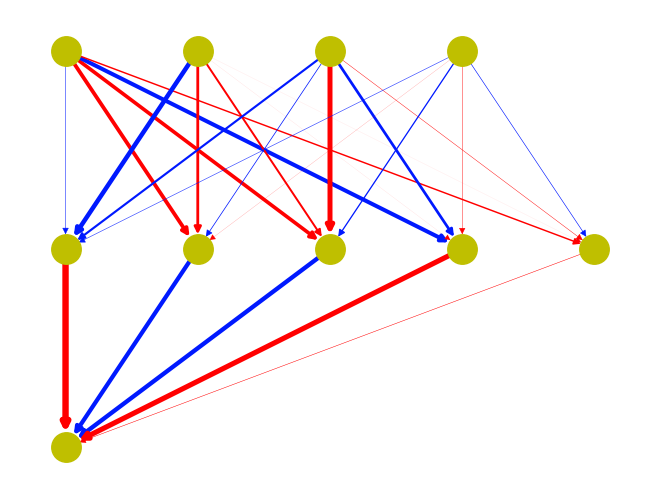

In [240]:
import networkx as nx
import colorsys

mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=5000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)